In [1]:
# Melhor filme para TV

import requests
from bs4 import BeautifulSoup

planilha = []

links_filmes = ["https://www.imdb.com/title/tt9495224/?ref_=nv_sr_1?ref_=nv_sr_1", 
                "https://www.imdb.com/title/tt8425058/?ref_=fn_al_tt_1",
                "https://www.imdb.com/title/tt4943998/?ref_=nv_sr_2?ref_=nv_sr_2",
                "https://www.imdb.com/title/tt7473890/?ref_=nv_sr_1?ref_=nv_sr_1",
                "https://www.imdb.com/title/tt1311076/?ref_=fn_al_tt_1"]

for link in links_filmes: # Pega cada link da lista de links para fazer a requisição
    requisicao = requests.get(link)

    sopa = BeautifulSoup(requisicao.content, "html.parser") # Dados brutos da página inteira
    
    # Conjunto que acha o nome do filme
    acha_nome_filme = sopa.find("div", {"class": "title_wrapper"}) # Div com o nome do episódio
    nome_filme_sujo = acha_nome_filme.find("h1", {"class": ""}).text.strip() # Limpa só o nome do episódio
    
    lista = nome_filme_sujo.split("(")
    nome_filme = lista[0]
    nome_filme = nome_filme.strip()
    ano = lista[1]
    ano = ano.replace(")", "")
                            
    # Conjunto que acha a avaliação do filme
    avaliacao = sopa.find("div", {"class": "imdbRating"})
    nota = avaliacao.find("span", {"itemprop": "ratingValue"}).text.strip()
    votos = avaliacao.find("span", {"class": "small", "itemprop": "ratingCount"}).text.strip()
    votos = votos.replace(",", "") # Limpa para poder converter para inteiro
    
    dicionario = {"filme": nome_filme, "ano": int(ano), "nota": float(nota), "votos": int(votos)} # Monta o dicionário
    planilha.append(dicionario) # Adiciona planilha ao dicionário
    
print(planilha)

[{'filme': 'Black Mirror: Bandersnatch', 'ano': 2018, 'nota': 7.2, 'votos': 95966}, {'filme': 'Brexit', 'ano': 2019, 'nota': 7.0, 'votos': 8587}, {'filme': 'Deadwood', 'ano': 2019, 'nota': 7.6, 'votos': 11629}, {'filme': 'King Lear', 'ano': 2018, 'nota': 6.1, 'votos': 2120}, {'filme': 'Meu Jantar com Hervé', 'ano': 2018, 'nota': 7.0, 'votos': 4551}]


In [2]:
import pandas

df = pandas.DataFrame(planilha)
df.to_csv("filme-tv.csv", sep = ";", encoding = "utf-8")
df.sort_values(by = "nota", ascending = False)

,filme,ano,nota,votos
2,Deadwood,2019,7.6,11629
0,Black Mirror: Bandersnatch,2018,7.2,95966
1,Brexit,2019,7.0,8587
4,Meu Jantar com Hervé,2018,7.0,4551
3,King Lear,2018,6.1,2120


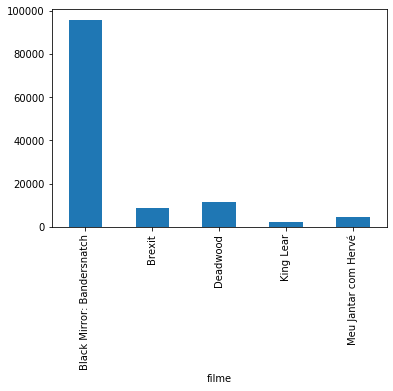

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

agrupamento1 = df.groupby("filme")["votos"].sum()
agrupamento1.plot.bar()

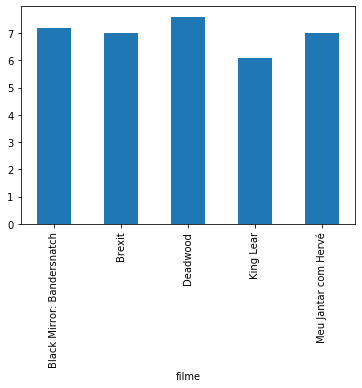

In [4]:
agrupamento2 = df.groupby("filme")["nota"].mean()
agrupamento2.plot.bar()